In [35]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('creditcard.csv', header=None)

In [3]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
df.columns = ['v1', 'v2','v3', 'v4','v5','v6','v7','v8','v9','v10','v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','v29','Amount','Class']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 31 columns):
v1        663 non-null int64
v2        663 non-null float64
v3        663 non-null float64
v4        663 non-null float64
v5        663 non-null float64
v6        663 non-null float64
v7        663 non-null float64
v8        663 non-null float64
v9        663 non-null float64
v10       663 non-null float64
v11       663 non-null float64
v12       663 non-null float64
v13       663 non-null float64
v14       663 non-null float64
v15       663 non-null float64
v16       663 non-null float64
v17       663 non-null float64
v18       663 non-null float64
v19       663 non-null float64
v20       663 non-null float64
v21       663 non-null float64
v22       663 non-null float64
v23       663 non-null float64
v24       663 non-null float64
v25       663 non-null float64
v26       663 non-null float64
v27       663 non-null float64
v28       663 non-null float64
v29       663 non-null float6

In [6]:
df['Class'].value_counts()

0    637
1     26
Name: Class, dtype: int64

In [7]:
df.isnull().sum()

v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
v29       0
Amount    0
Class     0
dtype: int64

In [8]:
X = df.iloc[:,1:-1]
y =df.iloc[:,-1]

In [9]:
X.head(2)

,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,...,v21,v22,v23,v24,v25,v26,v27,v28,v29,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [10]:
y.head(2)

0    0
1    0
Name: Class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(530, 29) (133, 29) (530,) (133,)


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9624060150375939

In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       130
          1       0.00      0.00      0.00         3

avg / total       0.96      0.98      0.97       133



C:\Users\avani\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


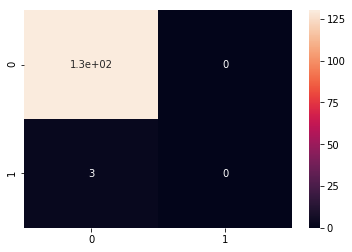

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [34]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(10))

     Actual  Predicted
420       0          0
306       0          0
14        0          0
639       0          0
75        0          0
162       0          0
489       0          0
640       0          0
127       0          0
395       0          0


In [37]:
y_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_probs = y_probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, y_probs)
print('AUC: %.3f' % auc)

AUC: 0.418


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

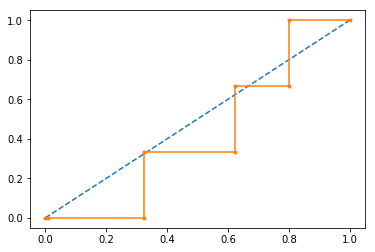

In [40]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=100)
ran.fit(X_train, y_train)
y_p = ran.predict(X_test)
ran.score(X_test,y_test)


0.9774436090225563

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train,y_train)
xg_pred = xg_reg.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)